## Teleportation for n=2

## Add library

In [103]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.providers.aer import AerSimulator
from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector

from math import sqrt

import numpy as np
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram
%matplotlib inline

# Import from Qiskit Aer noise module
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError
from qiskit.providers.aer.noise import amplitude_damping_error

print('done!!!')

done!!!


## Schematic of proposed protocol

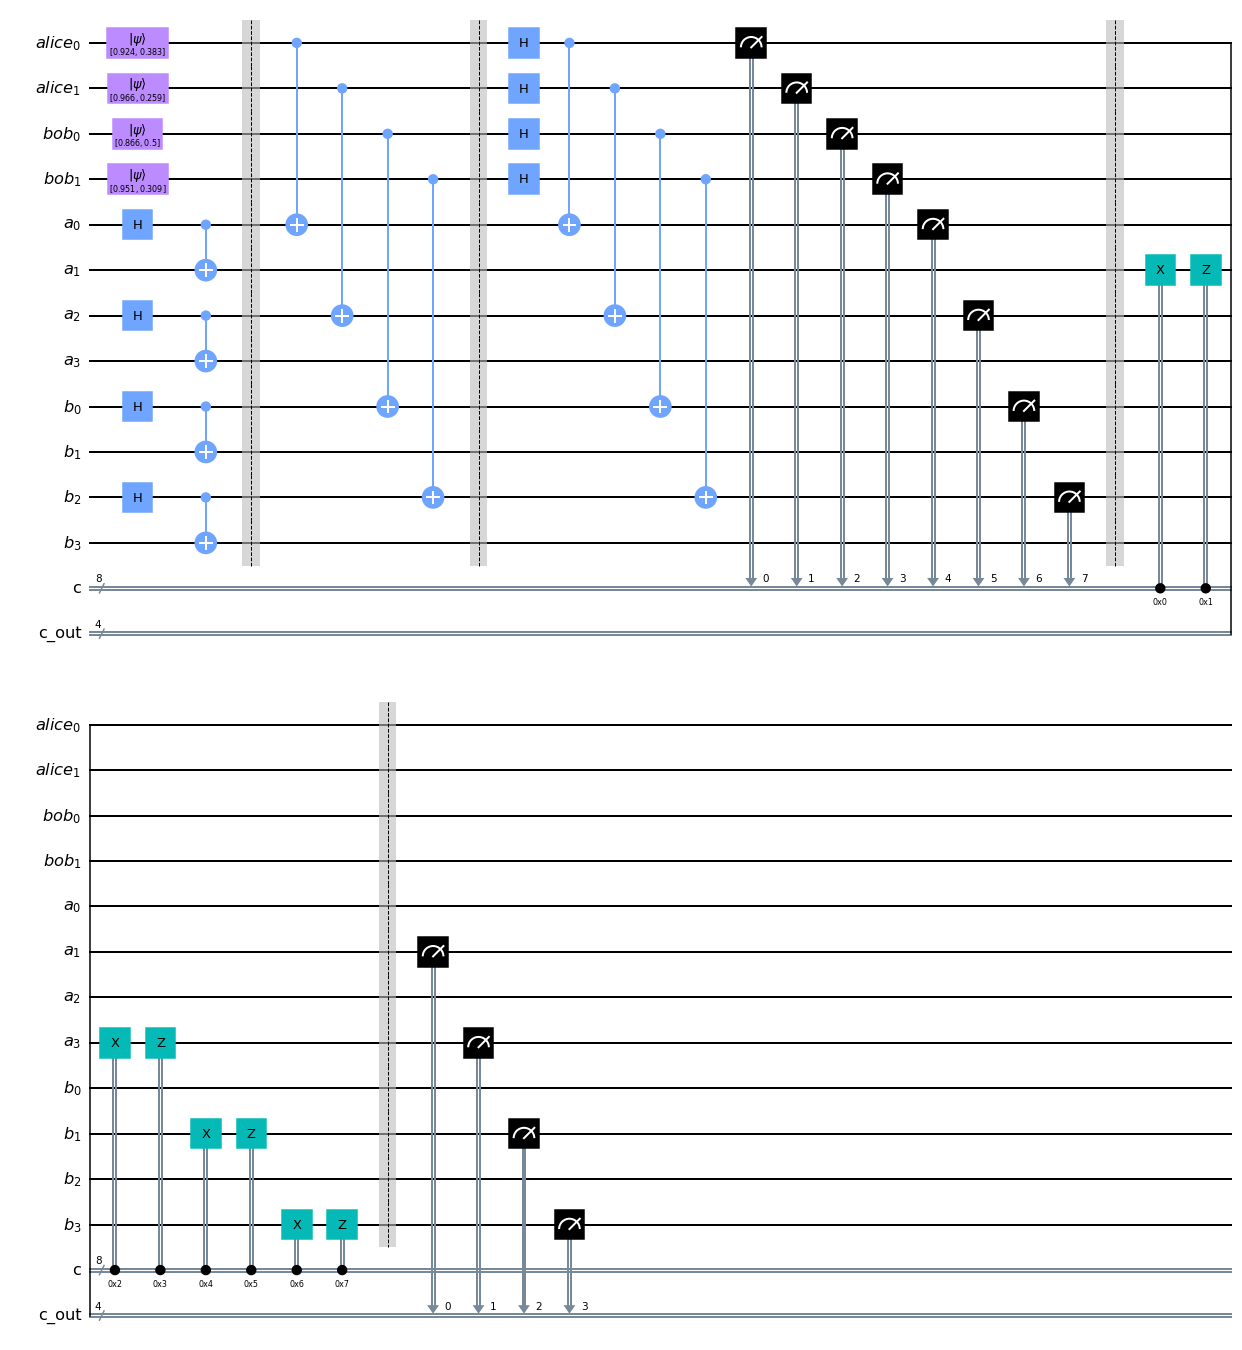

In [104]:
A = QuantumRegister(2, 'alice')
B = QuantumRegister(2, 'bob')
ch_a = QuantumRegister(4, 'a')
ch_b = QuantumRegister(4, 'b')
M = ClassicalRegister(8,'c')
M_out = ClassicalRegister(4,'c_out')
QC = QuantumCircuit(A,B,ch_a,ch_b,M,M_out)

theta_A_1 = np.pi/4
theta_A_2 = np.pi/6
theta_B_1 = np.pi/3
theta_B_2 = np.pi/5

initial_state_alice_1 = [np.cos(theta_A_1/2),np.sin(theta_A_1/2)]
initial_state_alice_2 = [np.cos(theta_A_2/2),np.sin(theta_A_2/2)]
initial_state_bob_1   = [np.cos(theta_B_1/2),np.sin(theta_B_1/2)]
initial_state_bob_2   = [np.cos(theta_B_2/2),np.sin(theta_B_2/2)]

QC.initialize(initial_state_alice_1,A[0])
QC.initialize(initial_state_alice_2,A[1])

QC.initialize(initial_state_bob_1,B[0])
QC.initialize(initial_state_bob_2,B[1])

QC.h(ch_a[0])
QC.h(ch_a[2])
QC.h(ch_b[0])
QC.h(ch_b[2])
QC.cx(ch_a[0],ch_a[1])
QC.cx(ch_a[2],ch_a[3])
QC.cx(ch_b[0],ch_b[1])
QC.cx(ch_b[2],ch_b[3])
QC.barrier(A,B,ch_a,ch_b)

QC.cx(A[0],ch_a[0])
QC.cx(A[1],ch_a[2])
QC.cx(B[0],ch_b[0])
QC.cx(B[1],ch_b[2])
QC.barrier(A,B,ch_a,ch_b)

QC.h(A[0])
QC.h(A[1])
QC.h(B[0])
QC.h(B[1])
QC.cx(A[0],ch_a[0])
QC.cx(A[1],ch_a[2])
QC.cx(B[0],ch_b[0])
QC.cx(B[1],ch_b[2])
QC.measure(A[0],M[0])
QC.measure(A[1],M[1])
QC.measure(B[0],M[2])
QC.measure(B[1],M[3])
QC.measure(ch_a[0],M[4])
QC.measure(ch_a[2],M[5])
QC.measure(ch_b[0],M[6])
QC.measure(ch_b[2],M[7])
QC.barrier(A,B,ch_a,ch_b)

QC.x(ch_a[1]).c_if(M,0x0)
QC.z(ch_a[1]).c_if(M,0x1)
QC.x(ch_a[3]).c_if(M,0x2)
QC.z(ch_a[3]).c_if(M,0x3)
QC.x(ch_b[1]).c_if(M,0x4)
QC.z(ch_b[1]).c_if(M,0x5)
QC.x(ch_b[3]).c_if(M,0x6)
QC.z(ch_b[3]).c_if(M,0x7)
QC.barrier(A,B,ch_a,ch_b)

QC.measure(ch_a[1],M_out[0])
QC.measure(ch_a[3],M_out[1])
QC.measure(ch_b[1],M_out[2])
QC.measure(ch_b[3],M_out[3])

QC.draw(output='mpl')

## Define proposed protocol like a function
Inputs:

$\theta_A \text{= polar angle of alice input qubit}$

$\theta_B \text{= polar angle of bob input qubit}$

In [105]:
def protocol(theta_A,theta_B):

    alice = QuantumRegister(2, 'alice')
    bob = QuantumRegister(2, 'bob')
    a = QuantumRegister(4, 'a')
    b = QuantumRegister(4, 'b')
    c_a0 = ClassicalRegister(1,'c_a0')
    c_a1 = ClassicalRegister(1,'c_a1')
    c_a2 = ClassicalRegister(1,'c_a2')
    c_a3 = ClassicalRegister(1,'c_a3')
    c_b0 = ClassicalRegister(1,'c_b0')
    c_b1 = ClassicalRegister(1,'c_b1')
    c_b2 = ClassicalRegister(1,'c_b2')
    c_b3 = ClassicalRegister(1,'c_b3')
    c_A0 = ClassicalRegister(1,'c_A0')
    c_A1 = ClassicalRegister(1,'c_A1')
    c_B0 = ClassicalRegister(1,'c_B0')
    c_B1 = ClassicalRegister(1,'c_B1')

    circ = QuantumCircuit(alice,bob,a,b,c_a0,c_a2,c_b0,c_b2,c_A0,c_A1,c_B0,c_B1,c_a1,c_a3,c_b1,c_b3)
    initial_state_alice_1 = [np.cos(theta_A[0]),np.sin(theta_A[0])]
    initial_state_alice_2 = [np.cos(theta_A[1]),np.sin(theta_A[1])]
    initial_state_bob_1   = [np.cos(theta_B[0]),np.sin(theta_B[0])]
    initial_state_bob_2   = [np.cos(theta_B[1]),np.sin(theta_B[1])]
    circ.initialize(initial_state_alice_1,alice[0])
    circ.initialize(initial_state_alice_2,alice[1])
    circ.initialize(initial_state_bob_1,bob[0])
    circ.initialize(initial_state_bob_2,bob[1])
    circ.h(a[0])
    circ.h(a[2])
    circ.h(b[0])
    circ.h(b[2])
    circ.cx(a[0],a[1])
    circ.cx(a[2],a[3])
    circ.cx(b[0],b[1])
    circ.cx(b[2],b[3])
    circ.barrier(alice,bob,a,b)
    circ.cx(alice[0],a[0])
    circ.cx(alice[1],a[2])
    circ.cx(bob[0],b[0])
    circ.cx(bob[1],b[2])
    circ.barrier(alice,bob,a,b)
    circ.measure(a[0],c_a0)
    circ.measure(a[2],c_a2)
    circ.measure(b[0],c_b0)   
    circ.measure(b[2],c_b2)
    circ.x(a[1]).c_if(c_a0,1)
    circ.x(a[3]).c_if(c_a2,1)
    circ.x(b[1]).c_if(c_b0, 1)
    circ.x(b[3]).c_if(c_b2, 1)
    circ.barrier(alice,bob,a,b)
    circ.h(alice[0])
    circ.h(alice[1])
    circ.h(bob[0])
    circ.h(bob[1])
    circ.measure(alice[0],c_A0)
    circ.measure(alice[1],c_A1)
    circ.measure(bob[0],c_B0)
    circ.measure(bob[1],c_B1)
    circ.z(a[1]).c_if(c_A0, 1)
    circ.z(a[3]).c_if(c_A1, 1)
    circ.z(b[1]).c_if(c_B0, 1)
    circ.z(b[3]).c_if(c_B1, 1)
    circ.barrier(alice,bob,a,b)
    circ.measure(a[1],c_a1)
    circ.measure(a[3],c_a3)
    circ.measure(b[1],c_b1)
    circ.measure(b[3],c_b3)
    
    return circ

## Simulation of protocol without noise effect

## Step1
$\theta_{A_1} = \frac{\pi}{2}$

$\theta_{A_2} = \frac{\pi}{4}$

$\theta_{B_1} = 0$

$\theta_{B_2} = \frac{\pi}{6}$

In [106]:
theta_A = [np.pi/2,np.pi/4]
theta_B = [0,np.pi/6]

Quantum_circuit = protocol(theta_A,theta_B)

## Step2
Simulation of quantum circuit with 'qasm_simulator'

In [107]:
simulator = Aer.get_backend('qasm_simulator')
circ = transpile(Quantum_circuit, simulator)

# Run and get counts
result = simulator.run(circ, shots=5000).result()
counts = result.get_counts(circ)

## Step3 
Calculating of the output measurments

In [108]:
state_b0_0 = 0
state_b0_1 = 0
state_b1_0 = 0
state_b1_1 = 0
state_00 = 0
state_01 = 0
state_10 = 0
state_11 = 0
i=0

for state in counts:
    i=i+1
    if (state[0]=='0')&(state[2]=='0'):
        state_00 = counts[state]
        state_b0_0=state_b0_0+counts[state]
        state_b1_0=state_b1_0+counts[state]
    if (state[0]=='0')&(state[2]=='1'):
        state_01 = counts[state]
        state_b0_0=state_b0_0+counts[state]
        state_b1_1=state_b1_1+counts[state]
    if (state[0]=='1')&(state[2]=='0'):
        state_10 = counts[state]
        state_b0_1=state_b0_1+counts[state]
        state_b1_0=state_b1_0+counts[state]
    if (state[0]=='1')&(state[2]=='1'):
        state_11 = counts[state]
        state_b0_1=state_b0_1+counts[state]
        state_b1_1=state_b1_1+counts[state]

P_b0_0 = state_b0_0/5000
P_b0_1 = state_b0_1/5000
P_b1_0 = state_b1_0/5000
P_b1_1 = state_b1_1/5000

count_new = {'00':state_00,'01':state_01,'10':state_10,'11':state_11}
count_bob0 = {'0':state_b0_0,'1':state_b0_1}
count_bob1 = {'0':state_b1_0,'1':state_b1_1}

Measurement of output $|\phi_{b_4}\rangle$ with input state: $|\phi_{B_2}\rangle =\frac{\pi}{6}$

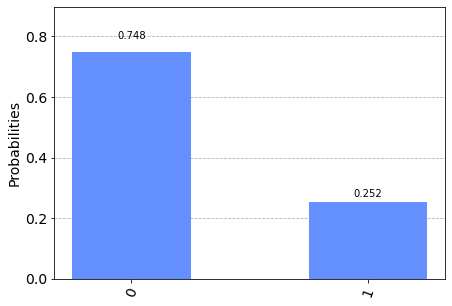

In [109]:
plot_histogram(count_bob0)

Measurement of output $|\phi_{b_2}\rangle$ with input state: $|\phi_{B_1}\rangle =0$

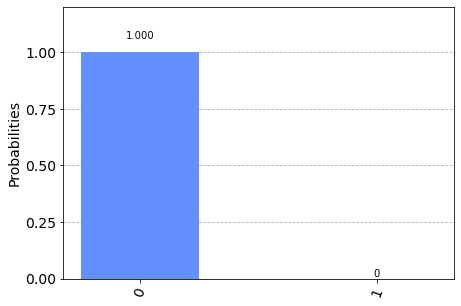

In [110]:
plot_histogram(count_bob1)

In [111]:
state_a0_0 = 0
state_a0_1 = 0
state_a1_0 = 0
state_a1_1 = 0
state_00 = 0
state_01 = 0
state_10 = 0
state_11 = 0
i=0

for state in counts:
    i=i+1
    if (state[4]=='0')&(state[6]=='0'):
        state_00 = counts[state]
        state_a0_0=state_a0_0+counts[state]
        state_a1_0=state_a1_0+counts[state]
    if (state[4]=='0')&(state[6]=='1'):
        state_01 = counts[state]
        state_a0_0=state_a0_0+counts[state]
        state_a1_1=state_a1_1+counts[state]
    if (state[4]=='1')&(state[6]=='0'):
        state_10 = counts[state]
        state_a0_1=state_a0_1+counts[state]
        state_a1_0=state_a1_0+counts[state]
    if (state[4]=='1')&(state[6]=='1'):
        state_11 = counts[state]
        state_a0_1=state_a0_1+counts[state]
        state_a1_1=state_a1_1+counts[state]

P_a0_0 = state_a0_0/5000
P_a0_1 = state_a0_1/5000
P_a1_0 = state_a1_0/5000
P_a1_1 = state_a1_1/5000

count_new = {'00':state_00,'01':state_01,'10':state_10,'11':state_11}
count_alice0 = {'0':state_a0_0,'1':state_a0_1}
count_alice1 = {'0':state_a1_0,'1':state_a1_1}

Measurement of output $|\phi_{a_4}\rangle$ with input state: $|\phi_{A_2}\rangle =\frac{\pi}{4}$

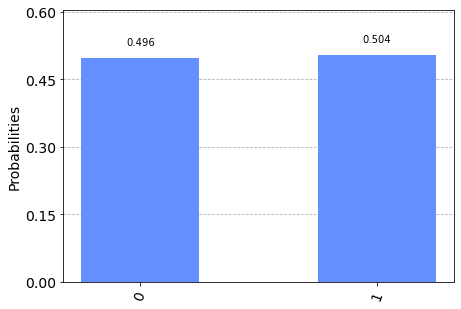

In [112]:
plot_histogram(count_alice0)

Measurement of output $|\phi_{a_2}\rangle$ with input state: $|\phi_{A_1}\rangle =\frac{\pi}{2}$

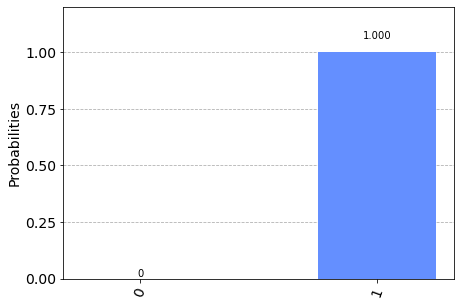

In [113]:
plot_histogram(count_alice1)

## Simulation of protocol with Amplitude-damping noise effect

## Step1
Define noise model of Amplitude-damping noise with parameter noise $\eta_{AD}$

In [114]:
def noise_model(eta_AD):
    noise_AD = NoiseModel()

    # Add depolarizing error to all single qubit u1, u2, u3 gates
    error = amplitude_damping_error(eta_AD, 0)

    noise_AD.add_quantum_error(error, ['id','u1','u2','u3'],[4])
    noise_AD.add_quantum_error(error, ['id','u1','u2','u3'],[5])
    noise_AD.add_quantum_error(error, ['id','u1','u2','u3'],[6])
    noise_AD.add_quantum_error(error, ['id','u1','u2','u3'],[7])
    noise_AD.add_quantum_error(error, ['id','u1','u2','u3'],[8])
    noise_AD.add_quantum_error(error, ['id','u1','u2','u3'],[9])
    noise_AD.add_quantum_error(error, ['id','u1','u2','u3'],[10])
    noise_AD.add_quantum_error(error, ['id','u1','u2','u3'],[11])
    

    error_2 = error.tensor(error)
    noise_AD.add_quantum_error(error_2, ['cx'],[0,4])
    noise_AD.add_quantum_error(error_2, ['cx'],[1,6])
    noise_AD.add_quantum_error(error_2, ['cx'],[2,8])
    noise_AD.add_quantum_error(error_2, ['cx'],[3,10])

    # Print noise model info
    return noise_AD

## Step2
$\theta_{A_1} = \frac{\pi}{2}$

$\theta_{A_2} = \frac{\pi}{4}$

$\theta_{B_1} = 0$

$\theta_{B_2} = \frac{\pi}{6}$

In [115]:
theta_A = [np.pi/2,np.pi/4]
theta_B = [0,np.pi/6]

Quantum_circuit_noisy = protocol(theta_A,theta_B)

## Step3
Simulation of quantum circuit with 'qasm_simulator' and noise model ($\eta_{AD}=0.3$)

In [116]:
noise_model_AD = noise_model(eta_AD=0.3)

sim_noise = AerSimulator(noise_model=noise_model_AD)

# Transpile circuit for noisy basis gates
Qc_noise = transpile(Quantum_circuit_noisy, sim_noise)

# Run and get counts
result = sim_noise.run(Qc_noise, shots=5000).result()
counts = result.get_counts(0)


## Step4
Calculating of the output measurments

In [117]:
state_b0_0 = 0
state_b0_1 = 0
state_b1_0 = 0
state_b1_1 = 0
state_00 = 0
state_01 = 0
state_10 = 0
state_11 = 0
i=0

for state in counts:
    i=i+1
    if (state[0]=='0')&(state[2]=='0'):
        state_00 = counts[state]
        state_b0_0=state_b0_0+counts[state]
        state_b1_0=state_b1_0+counts[state]
    if (state[0]=='0')&(state[2]=='1'):
        state_01 = counts[state]
        state_b0_0=state_b0_0+counts[state]
        state_b1_1=state_b1_1+counts[state]
    if (state[0]=='1')&(state[2]=='0'):
        state_10 = counts[state]
        state_b0_1=state_b0_1+counts[state]
        state_b1_0=state_b1_0+counts[state]
    if (state[0]=='1')&(state[2]=='1'):
        state_11 = counts[state]
        state_b0_1=state_b0_1+counts[state]
        state_b1_1=state_b1_1+counts[state]

P_b0_0 = state_b0_0/5000
P_b0_1 = state_b0_1/5000
P_b1_0 = state_b1_0/5000
P_b1_1 = state_b1_1/5000

count_new = {'00':state_00,'01':state_01,'10':state_10,'11':state_11}
count_bob0 = {'0':state_b0_0,'1':state_b0_1}
count_bob1 = {'0':state_b1_0,'1':state_b1_1}

Measurement of output $|\phi_{b_4}\rangle$ with input state: $|\phi_{B_2}\rangle =\frac{\pi}{6}$

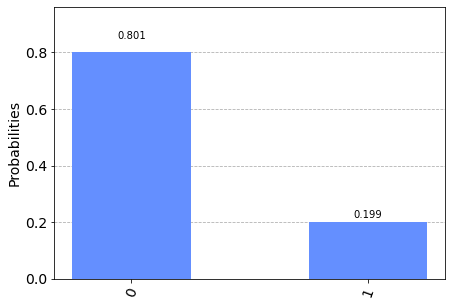

In [118]:
plot_histogram(count_bob0)

Measurement of output $|\phi_{b_2}\rangle$ with input state: $|\phi_{B_1}\rangle =0$

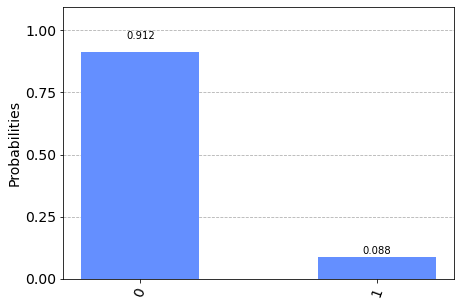

In [119]:
plot_histogram(count_bob1)

In [120]:
state_a0_0 = 0
state_a0_1 = 0
state_a1_0 = 0
state_a1_1 = 0
state_00 = 0
state_01 = 0
state_10 = 0
state_11 = 0
i=0

for state in counts:
    i=i+1
    if (state[4]=='0')&(state[6]=='0'):
        state_00 = counts[state]
        state_a0_0=state_a0_0+counts[state]
        state_a1_0=state_a1_0+counts[state]
    if (state[4]=='0')&(state[6]=='1'):
        state_01 = counts[state]
        state_a0_0=state_a0_0+counts[state]
        state_a1_1=state_a1_1+counts[state]
    if (state[4]=='1')&(state[6]=='0'):
        state_10 = counts[state]
        state_a0_1=state_a0_1+counts[state]
        state_a1_0=state_a1_0+counts[state]
    if (state[4]=='1')&(state[6]=='1'):
        state_11 = counts[state]
        state_a0_1=state_a0_1+counts[state]
        state_a1_1=state_a1_1+counts[state]

P_a0_0 = state_a0_0/5000
P_a0_1 = state_a0_1/5000
P_a1_0 = state_a1_0/5000
P_a1_1 = state_a1_1/5000

count_new = {'00':state_00,'01':state_01,'10':state_10,'11':state_11}
count_alice0 = {'0':state_a0_0,'1':state_a0_1}
count_alice1 = {'0':state_a1_0,'1':state_a1_1}

Measurement of output $|\phi_{a_4}\rangle$ with input state: $|\phi_{A_2}\rangle =\frac{\pi}{4}$

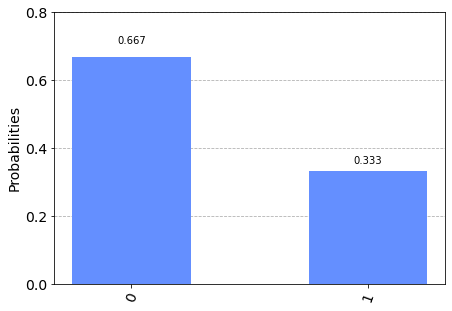

In [121]:
plot_histogram(count_alice0)

Measurement of output $|\phi_{a_2}\rangle$ with input state: $|\phi_{A_1}\rangle =\frac{\pi}{2}$

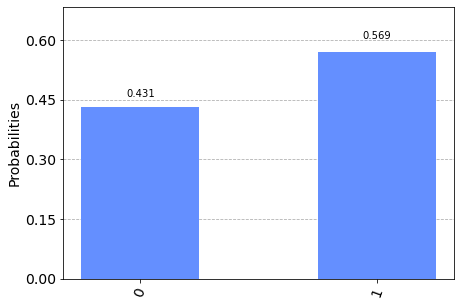

In [122]:
plot_histogram(count_alice1)